In [39]:
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt


In [106]:
df_btc = pd.read_csv('data/market_data_btc_usdt_1h.csv',  low_memory=False)
df_btc.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1514772000000,13203.00,13418.43,13200.00,13330.18,429.064572,1514775599999,5.710192e+06,4887,192.237935,2.558505e+06,0
1,1514775600000,13330.26,13611.27,13290.00,13410.03,420.087030,1514779199999,5.657448e+06,4789,137.918407,1.858041e+06,0
2,1514779200000,13434.98,13623.29,13322.15,13601.01,340.807329,1514782799999,4.588047e+06,4563,172.957635,2.328058e+06,0
3,1514782800000,13615.20,13699.00,13526.50,13558.99,404.229046,1514786399999,5.499055e+06,5086,142.331058,1.935710e+06,0
4,1514786400000,13539.00,13800.00,13510.00,13780.41,264.989684,1514789999999,3.613408e+06,4072,126.077500,1.718753e+06,0


In [107]:
df_btc.rename(columns={'Open time': 'OpenTime', 'Close time': 'CloseTime', 'Quote asset volume': 'QuoteAssetVolume', 'Number of trades':'NumberOfTrades', 'Taker buy base asset volume':'TakerBuyBaseAssetVolume','Taker buy quote asset volume': 'TakerBuyQuoteAssetVolume'  }, inplace=True)
df_btc = df_btc.drop(['Ignore', 'TakerBuyQuoteAssetVolume', 'QuoteAssetVolume','CloseTime'], axis=1)
df_btc.tail()

,OpenTime,Open,High,Low,Close,Volume,NumberOfTrades,TakerBuyBaseAssetVolume
44995,1676754000000,24594.69,24639.40,24580.62,24615.83,4951.92143,181918,2508.87261
44996,1676757600000,24616.31,24664.90,24599.22,24627.32,4849.18376,184946,2438.10271
44997,1676761200000,24627.32,24666.00,24618.67,24631.95,4557.33668,174710,2306.01854
44998,1676764800000,24632.05,24764.85,24622.18,24739.25,7487.83417,262510,3970.75642
44999,1676768400000,24739.23,24770.67,24635.94,24707.49,7639.09295,254899,3738.87084


In [108]:
df_btc['date'] = pd.to_datetime(df_btc['OpenTime'],unit='ms')


In [109]:
df_btc.set_index('date', inplace=True, drop=True)


In [110]:
df_btc = df_btc.drop(['OpenTime'], axis=1)


In [111]:
df_btc.iloc[200:300]

,Open,High,Low,Close,Volume,NumberOfTrades,TakerBuyBaseAssetVolume
date,,,,,,,
2018-01-09 11:00:00,14500.00,14800.00,14382.00,14726.00,587.911186,6606,285.330460
2018-01-09 12:00:00,14726.00,14829.98,14401.00,14659.57,597.657793,6314,289.194603
2018-01-09 13:00:00,14650.00,14700.00,14011.05,14041.03,1156.790250,11177,560.475188
2018-01-09 14:00:00,14072.87,14640.99,14064.13,14560.48,1087.916231,10165,550.161730
2018-01-09 15:00:00,14551.42,14800.00,14485.00,14654.96,664.173421,7265,298.133989
...,...,...,...,...,...,...,...
2018-01-13 10:00:00,14150.00,14249.50,13981.07,14129.08,504.026766,4871,230.269099
2018-01-13 11:00:00,14130.04,14200.00,14011.36,14178.00,328.556350,4155,153.548884
2018-01-13 12:00:00,14166.00,14377.99,14143.22,14279.00,507.616754,5089,219.844515


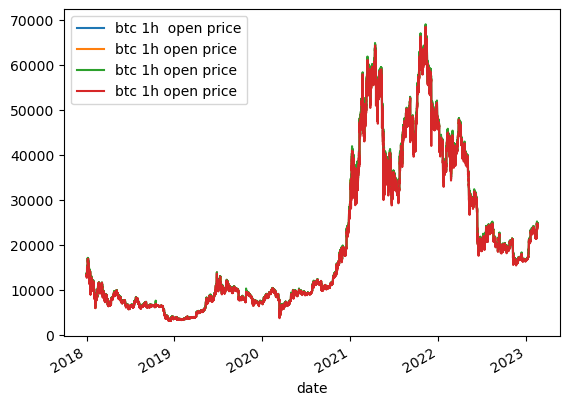

In [112]:
df_btc['Open'].plot(label = "btc 1h  open price")
df_btc['Close'].plot(label = "btc 1h open price")
df_btc['High'].plot(label = "btc 1h open price")
df_btc['Low'].plot(label = "btc 1h open price")
plt.legend()
plt.show()

<AxesSubplot:xlabel='date'>

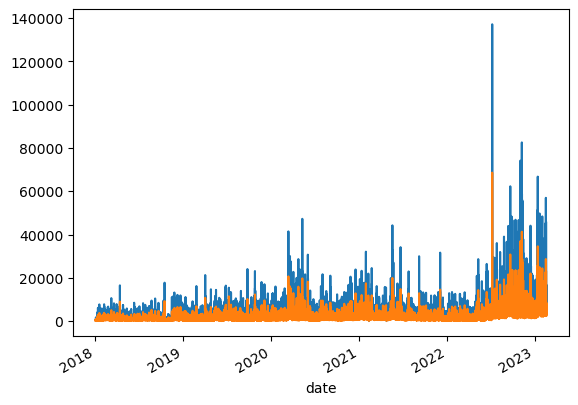

In [113]:
#volume analysis
df_btc["Volume"].plot(label="total volume")
df_btc["TakerBuyBaseAssetVolume"].plot(label="number of trades")


In [114]:
subset = df_btc.loc['2018-01-09 11:00:00':'2018-01-09 15:00:00']
subset

,Open,High,Low,Close,Volume,NumberOfTrades,TakerBuyBaseAssetVolume
date,,,,,,,
2018-01-09 11:00:00,14500.00,14800.00,14382.00,14726.00,587.911186,6606,285.330460
2018-01-09 12:00:00,14726.00,14829.98,14401.00,14659.57,597.657793,6314,289.194603
2018-01-09 13:00:00,14650.00,14700.00,14011.05,14041.03,1156.790250,11177,560.475188
2018-01-09 14:00:00,14072.87,14640.99,14064.13,14560.48,1087.916231,10165,550.161730
2018-01-09 15:00:00,14551.42,14800.00,14485.00,14654.96,664.173421,7265,298.133989


In [115]:
df_btc['return'] = (df_btc['Close']/df_btc['Close'].shift()) -1

In [116]:
df_btc.head()

,Open,High,Low,Close,Volume,NumberOfTrades,TakerBuyBaseAssetVolume,return
date,,,,,,,,
2018-01-01 02:00:00,13203.00,13418.43,13200.00,13330.18,429.064572,4887,192.237935,NaN
2018-01-01 03:00:00,13330.26,13611.27,13290.00,13410.03,420.087030,4789,137.918407,0.005990
2018-01-01 04:00:00,13434.98,13623.29,13322.15,13601.01,340.807329,4563,172.957635,0.014242
2018-01-01 05:00:00,13615.20,13699.00,13526.50,13558.99,404.229046,5086,142.331058,-0.003089
2018-01-01 06:00:00,13539.00,13800.00,13510.00,13780.41,264.989684,4072,126.077500,0.016330


<AxesSubplot:>

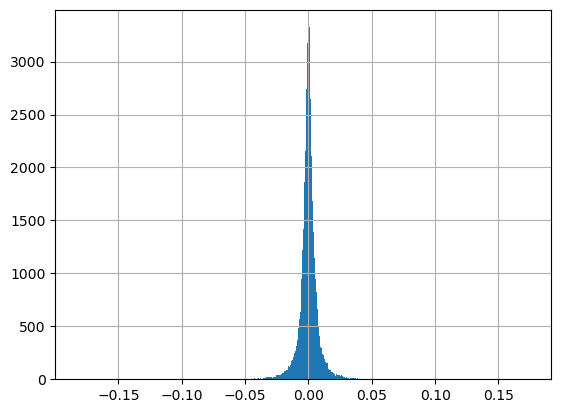

In [117]:
df_btc['return'].hist(bins=500)

In [94]:
df_btc['return'].describe()

count    43999.000000
mean         0.000041
std          0.008383
min         -0.182115
25%         -0.002809
50%          0.000075
75%          0.002929
max          0.173840
Name: return, dtype: float64

<AxesSubplot:>

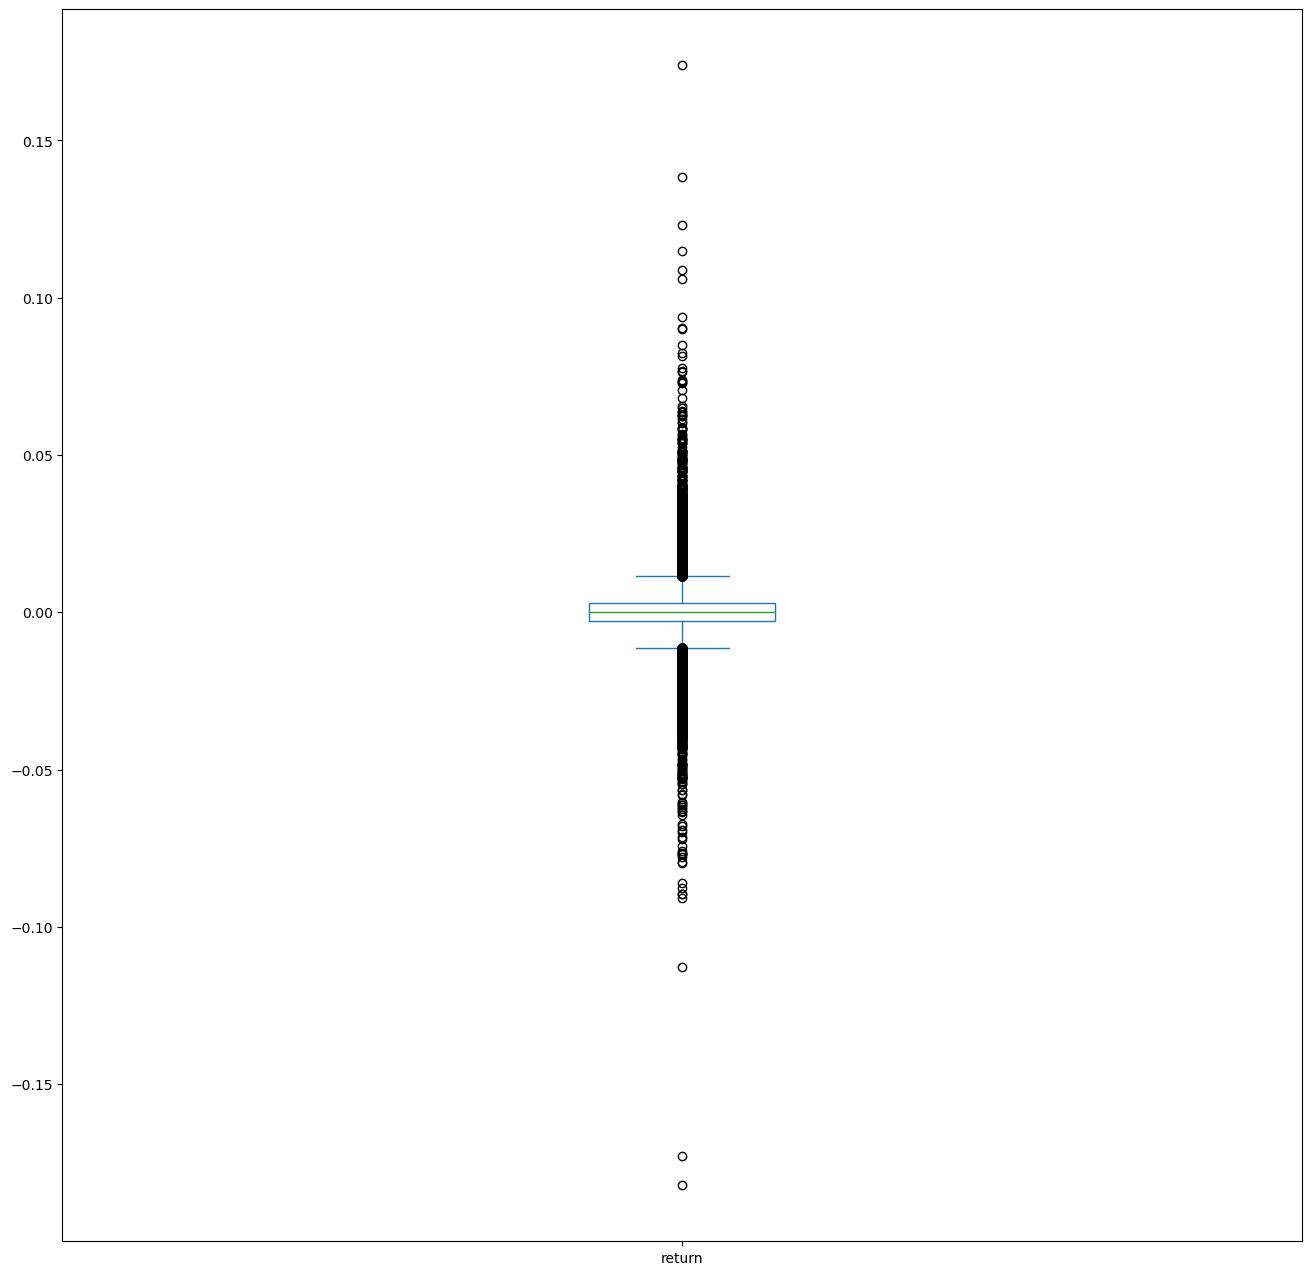

In [118]:
df_btc["return"].plot(kind='box', figsize = (16,16))

In [119]:
df_btc.ta.rsi(append=True)


date
2018-01-01 02:00:00          NaN
2018-01-01 03:00:00          NaN
2018-01-01 04:00:00          NaN
2018-01-01 05:00:00          NaN
2018-01-01 06:00:00          NaN
                         ...    
2023-02-18 21:00:00    54.488569
2023-02-18 22:00:00    55.058587
2023-02-18 23:00:00    55.301531
2023-02-19 00:00:00    60.615171
2023-02-19 01:00:00    58.402110
Name: RSI_14, Length: 45000, dtype: float64

In [131]:
df_btc['return_y'] = (df_btc['return'].shift(-1))*100

In [132]:
df_btc

,Open,High,Low,Close,Volume,NumberOfTrades,TakerBuyBaseAssetVolume,return,RSI_14,return_y,EMA_10_OHLC4
date,,,,,,,,,,,
2018-01-01 02:00:00,13203.00,13418.43,13200.00,13330.18,429.064572,4887,192.237935,NaN,NaN,0.599017,NaN
2018-01-01 03:00:00,13330.26,13611.27,13290.00,13410.03,420.087030,4789,137.918407,0.005990,NaN,1.424158,NaN
2018-01-01 04:00:00,13434.98,13623.29,13322.15,13601.01,340.807329,4563,172.957635,0.014242,NaN,-0.308948,NaN
2018-01-01 05:00:00,13615.20,13699.00,13526.50,13558.99,404.229046,5086,142.331058,-0.003089,NaN,1.633012,NaN
2018-01-01 06:00:00,13539.00,13800.00,13510.00,13780.41,264.989684,4072,126.077500,0.016330,NaN,-1.524338,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-18 21:00:00,24594.69,24639.40,24580.62,24615.83,4951.921430,181918,2508.872610,0.000859,54.488569,0.046677,24624.077506
2023-02-18 22:00:00,24616.31,24664.90,24599.22,24627.32,4849.183760,184946,2438.102710,0.000467,55.058587,0.018800,24624.597505
2023-02-18 23:00:00,24627.32,24666.00,24618.67,24631.95,4557.336680,174710,2306.018540,0.000188,55.301531,0.435613,24626.667959


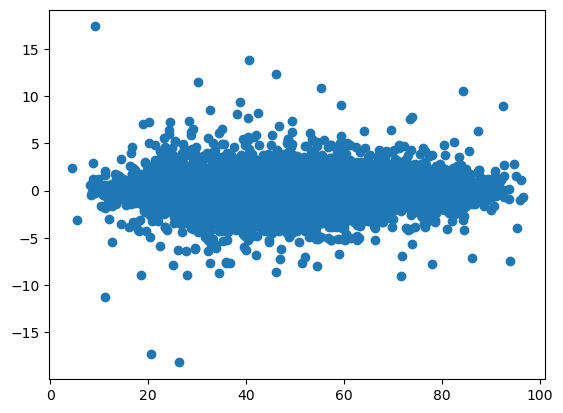

In [133]:
#Correlation between rsi and return
plt.scatter(df_btc['RSI_14'],df_btc["return_y"])

In [134]:
#Correlation between rsi and return
from pandas.plotting import scatter_matrix
df_scatter = pd.concat([df_btc['return'],df_btc['NumberOfTrades'],df_btc['TakerBuyBaseAssetVolume'],df_btc['Volume']], axis =1)

array([[<AxesSubplot:xlabel='return', ylabel='return'>,
        <AxesSubplot:xlabel='NumberOfTrades', ylabel='return'>,
        <AxesSubplot:xlabel='TakerBuyBaseAssetVolume', ylabel='return'>,
        <AxesSubplot:xlabel='Volume', ylabel='return'>],
       [<AxesSubplot:xlabel='return', ylabel='NumberOfTrades'>,
        <AxesSubplot:xlabel='NumberOfTrades', ylabel='NumberOfTrades'>,
        <AxesSubplot:xlabel='TakerBuyBaseAssetVolume', ylabel='NumberOfTrades'>,
        <AxesSubplot:xlabel='Volume', ylabel='NumberOfTrades'>],
       [<AxesSubplot:xlabel='return', ylabel='TakerBuyBaseAssetVolume'>,
        <AxesSubplot:xlabel='NumberOfTrades', ylabel='TakerBuyBaseAssetVolume'>,
        <AxesSubplot:xlabel='TakerBuyBaseAssetVolume', ylabel='TakerBuyBaseAssetVolume'>,
        <AxesSubplot:xlabel='Volume', ylabel='TakerBuyBaseAssetVolume'>],
       [<AxesSubplot:xlabel='return', ylabel='Volume'>,
        <AxesSubplot:xlabel='NumberOfTrades', ylabel='Volume'>,
        <AxesSubplot:xlabel='T

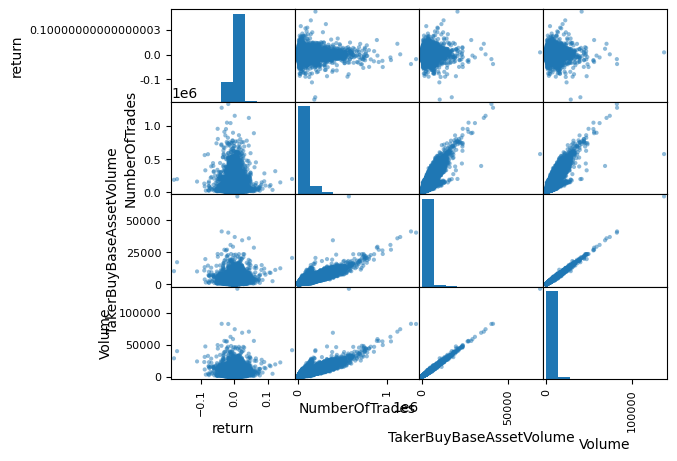

In [98]:
scatter_matrix(df_scatter)

In [144]:
df_btc.ta.ema(close=df_btc.ta.ohlc4(), length=10, suffix="OHLC4", append=True)



date
2018-01-01 02:00:00             NaN
2018-01-01 03:00:00             NaN
2018-01-01 04:00:00             NaN
2018-01-01 05:00:00             NaN
2018-01-01 06:00:00             NaN
                           ...     
2023-02-18 21:00:00    24624.077506
2023-02-18 22:00:00    24624.597505
2023-02-18 23:00:00    24626.667959
2023-02-19 00:00:00    24638.106966
2023-02-19 01:00:00    24651.784336
Name: EMA_10_OHLC4, Length: 45000, dtype: float64

In [135]:
df_btc

,Open,High,Low,Close,Volume,NumberOfTrades,TakerBuyBaseAssetVolume,return,RSI_14,return_y,EMA_10_OHLC4
date,,,,,,,,,,,
2018-01-01 02:00:00,13203.00,13418.43,13200.00,13330.18,429.064572,4887,192.237935,NaN,NaN,0.599017,NaN
2018-01-01 03:00:00,13330.26,13611.27,13290.00,13410.03,420.087030,4789,137.918407,0.005990,NaN,1.424158,NaN
2018-01-01 04:00:00,13434.98,13623.29,13322.15,13601.01,340.807329,4563,172.957635,0.014242,NaN,-0.308948,NaN
2018-01-01 05:00:00,13615.20,13699.00,13526.50,13558.99,404.229046,5086,142.331058,-0.003089,NaN,1.633012,NaN
2018-01-01 06:00:00,13539.00,13800.00,13510.00,13780.41,264.989684,4072,126.077500,0.016330,NaN,-1.524338,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-18 21:00:00,24594.69,24639.40,24580.62,24615.83,4951.921430,181918,2508.872610,0.000859,54.488569,0.046677,24624.077506
2023-02-18 22:00:00,24616.31,24664.90,24599.22,24627.32,4849.183760,184946,2438.102710,0.000467,55.058587,0.018800,24624.597505
2023-02-18 23:00:00,24627.32,24666.00,24618.67,24631.95,4557.336680,174710,2306.018540,0.000188,55.301531,0.435613,24626.667959


In [137]:
subset = df_btc.loc['2022-01-01 00:00:00':'2022-12-31 23:00:00']


In [143]:
subset

,Open,High,Low,Close,Volume,NumberOfTrades,TakerBuyBaseAssetVolume,return,RSI_14,return_y,EMA_10_OHLC4
date,,,,,,,,,,,
2022-01-01 00:00:00,46216.93,46731.39,46208.37,46656.13,1503.33095,38608,806.06536,0.009503,44.375897,0.261509,46653.919220
2022-01-01 01:00:00,46656.14,46949.99,46574.06,46778.14,943.81539,31872,491.18067,0.002615,46.284178,0.071893,46669.494361
2022-01-01 02:00:00,46778.14,46928.94,46721.96,46811.77,485.16860,24364,206.35113,0.000719,46.825676,0.003055,46695.077659
2022-01-01 03:00:00,46811.77,46916.63,46760.12,46813.20,562.88971,19882,248.28212,0.000031,46.850212,-0.218208,46718.778085
2022-01-01 04:00:00,46813.21,46887.33,46591.23,46711.05,861.88389,23357,397.53563,-0.002182,45.244236,1.030805,46724.582979
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,16577.78,16590.06,16565.10,16570.14,4044.43359,116587,2067.92157,-0.000461,50.101091,-0.009294,16580.653955
2022-12-31 20:00:00,16570.14,16574.97,16564.09,16568.60,2622.14355,90705,1311.38111,-0.000093,49.712851,-0.122642,16578.616872
2022-12-31 21:00:00,16568.19,16571.64,16544.12,16548.28,3618.77389,105065,1746.41338,-0.001226,44.781776,-0.165999,16574.878804


In [153]:
df_btc.loc[df_btc.index.hour==23]

,Open,High,Low,Close,Volume,NumberOfTrades,TakerBuyBaseAssetVolume,return,RSI_14,return_y,EMA_10_OHLC4
date,,,,,,,,,,,
2018-01-01 23:00:00,13455.24,13500.00,13355.01,13380.00,345.218495,4013,150.590981,-0.005352,52.210973,2.765396,13331.213294
2018-01-02 23:00:00,14799.97,14887.08,14600.00,14675.11,764.349881,5807,464.505566,-0.008436,69.886745,0.677474,14382.957849
2018-01-03 23:00:00,14792.32,14940.82,14710.00,14919.51,648.924200,6624,527.040262,0.008081,55.888529,-1.110961,14839.302931
2018-01-04 23:00:00,14895.95,15100.08,14774.25,15059.54,892.734362,6221,621.968812,0.008042,60.111615,-1.019487,14755.403447
2018-01-05 23:00:00,17021.36,17176.24,16801.02,16960.39,929.761738,8533,544.218303,-0.003582,76.067654,0.221752,16549.220396
...,...,...,...,...,...,...,...,...,...,...,...
2023-02-14 23:00:00,22188.07,22261.57,22167.00,22199.84,8642.178880,202971,4364.766930,0.000548,62.923015,-0.225677,22111.099101
2023-02-15 23:00:00,24150.26,24344.00,24148.00,24324.05,13579.429890,345568,7003.142080,0.007140,89.876854,1.065283,23500.332428
2023-02-16 23:00:00,23994.78,24096.70,23505.25,23517.72,27880.337630,608861,13349.158570,-0.019881,33.839541,0.831926,24467.276980
